# LinearRegression

# Step 1 : Importing all the required libraries


In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Step 2 : Reading the dataset

In [60]:
data_set = pd.read_csv('Part-1-data-processing\\data.csv')
data_set

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Etracting the dependent and independent variable

In [99]:
X = data_set.iloc[:,:-1].values
y = data_set.iloc[:,3].values
X


array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Step 3 : Data cleaning

In [62]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputerimputer = imputer.fit(X[:,1:3])
x[:,1:3] = imputer.transform(X[:,1:3])


# Encoding categorical data

# for country variable

In [103]:
label_encoder_x = LabelEncoder()
X[:,0] = label_encoder_x.fit_transform(X[:,0])
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, nan],
       [0, 35.0, 58000.0],
       [2, nan, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

# Dummy variables

In [105]:
onehot_encoder = OneHotEncoder()
X = onehot_encoder.fit_transform(X).toarray()
X

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0.,

# for purchased variable

In [68]:
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

# Step 4 : Training the model

# Splitting the data set into train and test data set

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)


# LinearRegression 

In [72]:
regr = LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_test,y_test))

-0.09415233647715371


# Step 5 : Exploring

In [86]:
y_pred = regr.predict(X_test)
y_pred

array([0.58490742, 0.70691404, 0.54901623])

In [88]:
y_test

array([0, 1, 0], dtype=int64)

In [93]:
print(accuracy_score(y_test,y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

<function matplotlib.pyplot.show(close=None, block=None)>

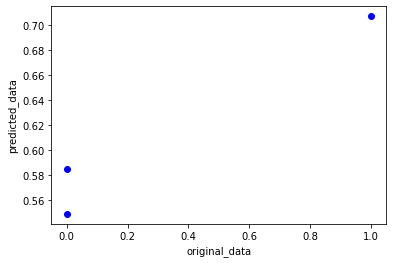

In [84]:
plt.scatter(y_test,y_pred,color = 'b')
plt.xlabel('original_data')
plt.ylabel('predicted_data')
plt.show